In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sb_utils import save_file
sns.set()

Fun fact: sns stands for [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), a character from "The West Wing" (1999). 

In [2]:
cat_data = pd.read_excel('cat_data.xlsx')

In [3]:
cat_data.head()

,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
0,1,4.0274,2,1,BEN,8,0,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318
1,2,2.1096,2,1,BEN,8,0,1,5,4,...,1,1,3,3,1.0,0.0,1.0,-0.633626,1.419777,0.994083
2,3,7.6822,1,1,BUR,4,0,1,4,5,...,1,1,2,1,4.0,3.0,2.0,-0.392731,-0.364198,0.666318
3,4,5.0027,1,1,BUR,4,4,0,5,5,...,1,2,1,1,1.0,0.0,1.0,0.090309,-0.780989,1.330449
4,5,5.0137,1,1,EUR,4,5,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318


In [4]:
cat_data.describe()

,ID_number,Age,Gender,Neuter_status,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
count,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5683.000000,5696.000000,5719.000000,5726.000000,5726.000000,5.726000e+03
mean,2863.500000,4.753083,1.538945,0.779776,4.618407,2.546455,0.847363,3.771743,4.089067,1.116312,1.096577,1.584177,2.026546,1.884736,1.794123,0.912395,1.070467,-0.000003,-0.000003,-1.359264e-07
std,1653.098152,3.769304,0.498525,0.414434,1.576421,1.910538,0.359669,0.864301,0.878921,0.417632,0.368069,0.840766,0.996585,1.051672,0.998514,1.544499,0.384330,0.896939,0.999784,9.768488e-01
min,1.000000,0.167100,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.964370,-2.433800,-4.061199e+00
25%,1432.250000,1.789000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-0.448792,-0.780989,-6.867931e-01
50%,2863.500000,3.879450,2.000000,1.000000,4.000000,2.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,-0.330445,-0.175096,-1.865431e-03
75%,4294.750000,6.778100,2.000000,1.000000,5.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,0.072477,0.497528,7.201160e-01
max,5726.000000,24.811000,2.000000,1.000000,8.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,3.000000,9.644858,3.577881,1.997650e+00


5726 records. Grooming and wool_sucking are missing quite a few values. 

I think I'll eventually fill in the 7 missing records for Behaviour_problem with mean or median. 

The excel file had relevant column descriptions as follows:
* Age (in years)
* Gender (1=male, 2=female)
* Neuter (0=intact, 1=neutered)
* Outdoors (0=never, 1=few times/year, 2=1-2 times/month, 3=1-2 times/week, 4=3-5 times/week, 5=daily) (I think I'll condense this one). 
* Other_cats (Are there other cats in the household? 0=no, 1=yes)
* Activity_level, Contact_people, Aggression_stranger, Aggression_owner, Aggression_cats, Shyness_novel, Shyness_strangers, Grooming (excessive)(1-5, not at all, a little, moderately, a lot, very much). 
* Wool_sucking (0 = never, 1 = 1-3 times in the cat's lifetime, 2 = 1-12 times a year, 3 = 1-4 times a month, 4 = 1-3 times a week, 5 = daily, 6 = many times per day, 7 = most of the day)
* Behaviour_problem (Does your cat have a behavior problem? 0=I don't know, 1=no, 2=yes, self-diagnosed, 3=yes, diagnosed by a veterinarian). 

### Note:
The aggression, shyness, and extraversion components are a result of PCA on seven behaviour traits (activity level; contact to people; shyness towards strangers and novel objects, agression towards family members, strangers, and other cats). I am confused as to what role this variable should play. I think I want my model to essentially be plug in demographics and recorded behavioral traits and poop out a personality type. The article this data was collected for was linking breed and behavioral traits. 

### Breed_group: 
ABY = Abyssinian, Somali, and Ocicat
BEN = Bengal
BRI = British Shorthair
BUR = Burmese and Burmilla
CRX = Cornish Rex
DRX = Devon Rex
EUR = European Shorthair
HCS = house cat
KOR = Korat
MCO = Maine Coon
NFO = Norwegian Forest Cat
ORI = Balinese, Oriental Longhair, Oriental Shorthair, Seychellois Longhair, Seychellois Shorthair, and Siamese
PER = Persian and Exotic
RAG = Ragdoll
RUS = Russian Blue
SBI = Saint Birman
SIB = Siberian and Neva Masquerade
TUV = Turkish Van and Angora
other = other breeds

## Filling NaNs in Behaviour_problem

<AxesSubplot:xlabel='Behaviour_problem', ylabel='count'>

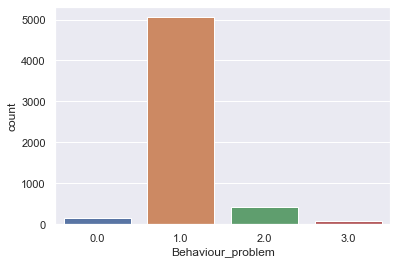

In [5]:
sns.countplot(x='Behaviour_problem', data=cat_data )

In [6]:
bp_med = cat_data.Behaviour_problem.median()

In [7]:
cat_data.Behaviour_problem = cat_data.Behaviour_problem.fillna(bp_med)

In [8]:
cat_data.describe()

,ID_number,Age,Gender,Neuter_status,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
count,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5683.000000,5696.000000,5726.000000,5726.000000,5726.000000,5.726000e+03
mean,2863.500000,4.753083,1.538945,0.779776,4.618407,2.546455,0.847363,3.771743,4.089067,1.116312,1.096577,1.584177,2.026546,1.884736,1.794123,0.912395,1.070381,-0.000003,-0.000003,-1.359264e-07
std,1653.098152,3.769304,0.498525,0.414434,1.576421,1.910538,0.359669,0.864301,0.878921,0.417632,0.368069,0.840766,0.996585,1.051672,0.998514,1.544499,0.384103,0.896939,0.999784,9.768488e-01
min,1.000000,0.167100,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.964370,-2.433800,-4.061199e+00
25%,1432.250000,1.789000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-0.448792,-0.780989,-6.867931e-01
50%,2863.500000,3.879450,2.000000,1.000000,4.000000,2.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,-0.330445,-0.175096,-1.865431e-03
75%,4294.750000,6.778100,2.000000,1.000000,5.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,0.072477,0.497528,7.201160e-01
max,5726.000000,24.811000,2.000000,1.000000,8.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,3.000000,9.644858,3.577881,1.997650e+00


## Filling Grooming
We're missing Grooming data on 43 kitties!

In [9]:
cat_data.Grooming.describe()

count    5683.000000
mean        1.794123
std         0.998514
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: Grooming, dtype: float64

In [10]:
# More than half of cats fall in 1 category
cat_data.Grooming.value_counts(normalize=True)

1.0    0.549006
3.0    0.226641
2.0    0.171212
4.0    0.042935
5.0    0.010206
Name: Grooming, dtype: float64

In [11]:
cat_data.Grooming = cat_data.Grooming.fillna(np.median(cat_data.Grooming))

## Filling Wool_sucking

In [12]:
cat_data.Wool_sucking.describe()

count    5696.000000
mean        0.912395
std         1.544499
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         7.000000
Name: Wool_sucking, dtype: float64

In [13]:
# Almost 70% are a 0, so that's what the NaNs are gonna get!
cat_data.Wool_sucking.value_counts(normalize=True)

0.0    0.683111
4.0    0.073912
2.0    0.070751
3.0    0.066362
1.0    0.064607
5.0    0.036341
6.0    0.004565
7.0    0.000351
Name: Wool_sucking, dtype: float64

In [14]:
cat_data.Wool_sucking = cat_data.Wool_sucking.fillna(np.median(cat_data.Wool_sucking))

## Distributions per feature

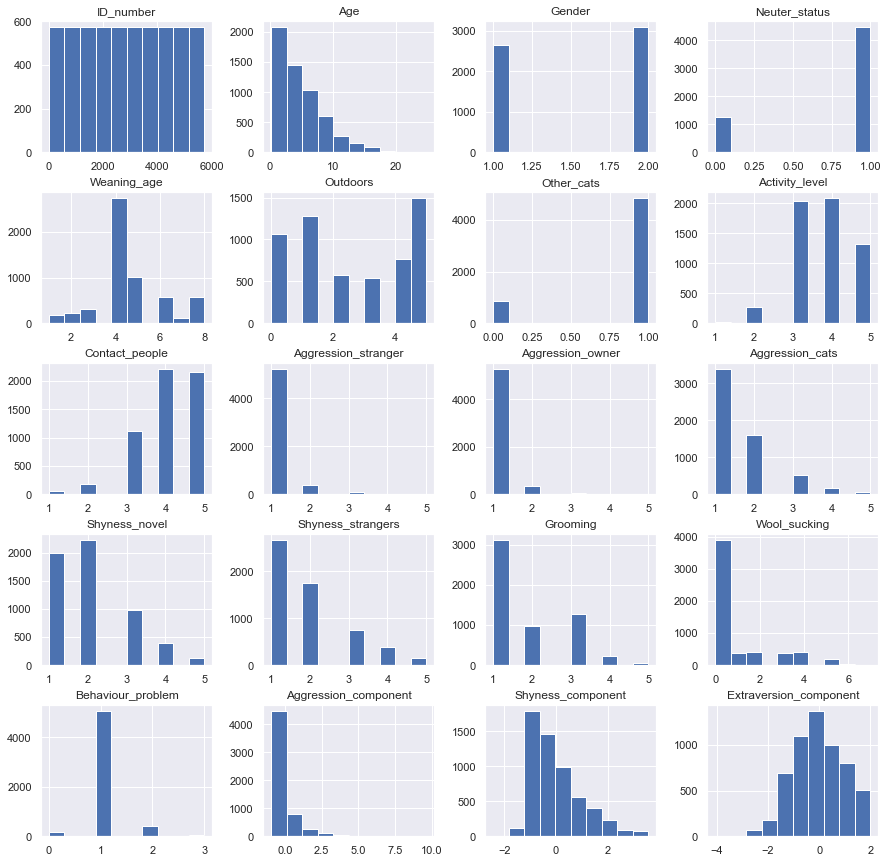

In [15]:
cat_data.hist(figsize = (15, 15));

In [16]:
cat_data.ID_number.duplicated().value_counts() # no duplicates

False    5726
Name: ID_number, dtype: int64

In [17]:
cat_data.Gender.value_counts(normalize=True) # 1=female 

2    0.538945
1    0.461055
Name: Gender, dtype: float64

In [18]:
cat_data.Behaviour_problem.value_counts(normalize=True)

1.0    0.884212
2.0    0.074747
0.0    0.028816
3.0    0.012225
Name: Behaviour_problem, dtype: float64

In [19]:
# proportion self vs. vet-diagnosed 
cat_data.loc[((cat_data.Behaviour_problem == 2)
                   | (cat_data.Behaviour_problem == 3)),
                  'Behaviour_problem'].value_counts(normalize=True)

2.0    0.859438
3.0    0.140562
Name: Behaviour_problem, dtype: float64

## Initial Observations:
* Ignore the ID number plot, of course. Should I make this a string so it doesn't treat it as a numerical value in the future?
* More female than males cats, but pretty even (54%, 46%). 
* 88% of cats do not have a behaviour problem. Of those that do, 86% are self-diagnosed. 
* I think I'll change outdoors to 0=indoor (0, 1), 1=indoor/outdoor (2, 3, 4), and 2=outdoor (5). I think this is more in line with information I could get from shelter and those groups kind of line up with one another. 

## Setting Index to ID number, for now. 

In [20]:
cat_clean = cat_data.set_index("ID_number") # I figured this was the best way to make sure 
                                                 # it's not considered a variable in any future calculations 

In [21]:
cat_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 1 to 5726
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5726 non-null   float64
 1   Gender                  5726 non-null   int64  
 2   Neuter_status           5726 non-null   int64  
 3   Breed_group             5726 non-null   object 
 4   Weaning_age             5726 non-null   int64  
 5   Outdoors                5726 non-null   int64  
 6   Other_cats              5726 non-null   int64  
 7   Activity_level          5726 non-null   int64  
 8   Contact_people          5726 non-null   int64  
 9   Aggression_stranger     5726 non-null   int64  
 10  Aggression_owner        5726 non-null   int64  
 11  Aggression_cats         5726 non-null   int64  
 12  Shyness_novel           5726 non-null   int64  
 13  Shyness_strangers       5726 non-null   int64  
 14  Grooming                5683 non-null   

No missing values! An index system that makes sense! 

In [22]:
datapath = './Data'
save_file(cat_clean, 'cat_clean.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\cat_clean.csv"
